# Analyse exploratoire des données

## 1. Description du dataset

Les données proviennent de la plateforme *Zindi Africa*, dans le cadre de la compétition "*[Zimnat Insurance Recommendation Challenge](https://zindi.africa/competitions/zimnat-insurance-recommendation-challenge/data)*". Elles concernent la clientèle de Zimnat, une compagnie d'assurance majeure (vraisemblablement au Zimbabwe), et visent à prédire les produits d'assurance susceptibles d'intéresser les clients existants.

Le dataset contient des données clients avec des informations démographiques (année de naissance, date d'adhésion), professionnelles (code d'occupation, catégorie d'occupation) et transactionnelles (code de branche visitée). Chaque client est identifié par un ID unique.

In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/insurance-recommendation-challenge/Train.csv")
df.head()

,ID,join_date,sex,marital_status,birth_year,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
0,4WKQSBB,1/2/2019,F,M,1987,1X1H,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
1,CP5S02H,1/6/2019,F,M,1981,UAOD,2A7I,T4MS,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2YKDILJ,1/6/2013,M,U,1991,748L,QZYX,90QI,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2S9E81J,1/8/2019,M,M,1990,1X1H,BP09,56SI,0,0,...,0,0,0,1,0,0,0,0,0,0
4,BHDYVFT,1/8/2019,M,M,1990,748L,NO3L,T4MS,0,0,...,0,0,0,0,0,0,1,1,0,0


In [2]:
print("Liste des variables :")
print(list(df.columns))

Liste des variables :
['ID', 'join_date', 'sex', 'marital_status', 'birth_year', 'branch_code', 'occupation_code', 'occupation_category_code', 'P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3']


In [3]:
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

Nombre de lignes : 29132
Nombre de colonnes : 29


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29132 entries, 0 to 29131
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        29132 non-null  object
 1   join_date                 29130 non-null  object
 2   sex                       29132 non-null  object
 3   marital_status            29132 non-null  object
 4   birth_year                29132 non-null  int64 
 5   branch_code               29132 non-null  object
 6   occupation_code           29132 non-null  object
 7   occupation_category_code  29132 non-null  object
 8   P5DA                      29132 non-null  int64 
 9   RIBP                      29132 non-null  int64 
 10  8NN1                      29132 non-null  int64 
 11  7POT                      29132 non-null  int64 
 12  66FJ                      29132 non-null  int64 
 13  GYSR                      29132 non-null  int64 
 14  SOP4                  

None

In [5]:
# Selon le fichier variableDefinitions.txt, on a 5 variables catégorielles soit : 
cat_columns = ['sex', 'marital_status', 'branch_code', 'occupation_code', 'occupation_category_code']
# 21 variables de produits binaires
product_cols = [
    'P5DA', 'RIBP', '8NN1', '7POT', '66FJ', 'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 
    'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X', 'K6QO', 'QBOL', 'JWFN', 'JZ9D', 
    'J9JW', 'GHYX', 'ECY3'
]
# 02 variables de type DateTime
time_cols = ['join_date', 'birth_year']

## 2. Analyse de la qualité des données

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [7]:
# Valeurs manquantes
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Valeurs manquantes :\n")
missing.sort_values(ascending=False)

Valeurs manquantes :



join_date    2
dtype: int64

In [8]:
# Valeurs doubles
print("Nombre de doublons :\n")
df.duplicated().sum()

Nombre de doublons :



np.int64(0)

In [9]:
display(df.describe(include=['O']))

,ID,join_date,sex,marital_status,branch_code,occupation_code,occupation_category_code
count,29132,29130,29132,29132,29132,29132,29132
unique,29132,132,2,8,15,233,6
top,DEJBWYU,1/5/2018,M,M,748L,2A7I,T4MS
freq,1,1319,20329,22913,8136,7089,18619


Constatons que pour 29132 lignes, on a exactement 29132 ID de clients différents et aussi 0 doublons. La colonne ID ne nous donne aucune information si ce n'est l'unicité des clients de la base.

In [10]:
display(df.describe())

,birth_year,P5DA,RIBP,8NN1,7POT,66FJ,GYSR,SOP4,RVSZ,PYUQ,...,AHXO,BSTQ,FM3X,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3
count,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,...,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000,29132.000000
mean,1979.517060,0.001373,0.061101,0.005389,0.010847,0.011637,0.000137,0.014795,0.869422,0.074592,...,0.018502,0.011122,0.003776,0.742448,0.234553,0.010676,0.048915,0.048675,0.030963,0.037828
std,9.325604,0.037030,0.239520,0.073215,0.103585,0.107246,0.011717,0.120733,0.336944,0.262736,...,0.134760,0.104874,0.061333,0.437293,0.423726,0.102771,0.215695,0.215191,0.173219,0.190783
min,1932.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1973.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2011.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Formatons les données pour respecter leurs types
df['join_date'] = pd.to_datetime(df['join_date'], errors='coerce')

In [12]:
df['sex'] = df['sex'].str.upper()

In [13]:
# Conversion des dates
df['join_year'] = df['join_date'].dt.year
df['join_month'] = df['join_date'].dt.month

In [14]:
# On suppose l'année  du dataset
current_year = 2020 
df['age'] = current_year - df['birth_year']

In [15]:
cols = list(df.columns)
cols = [col for col in cols if col not in ['ID','join_date', 'birth_year']]

In [16]:
df = df[cols]

## 3. Analyse univariée

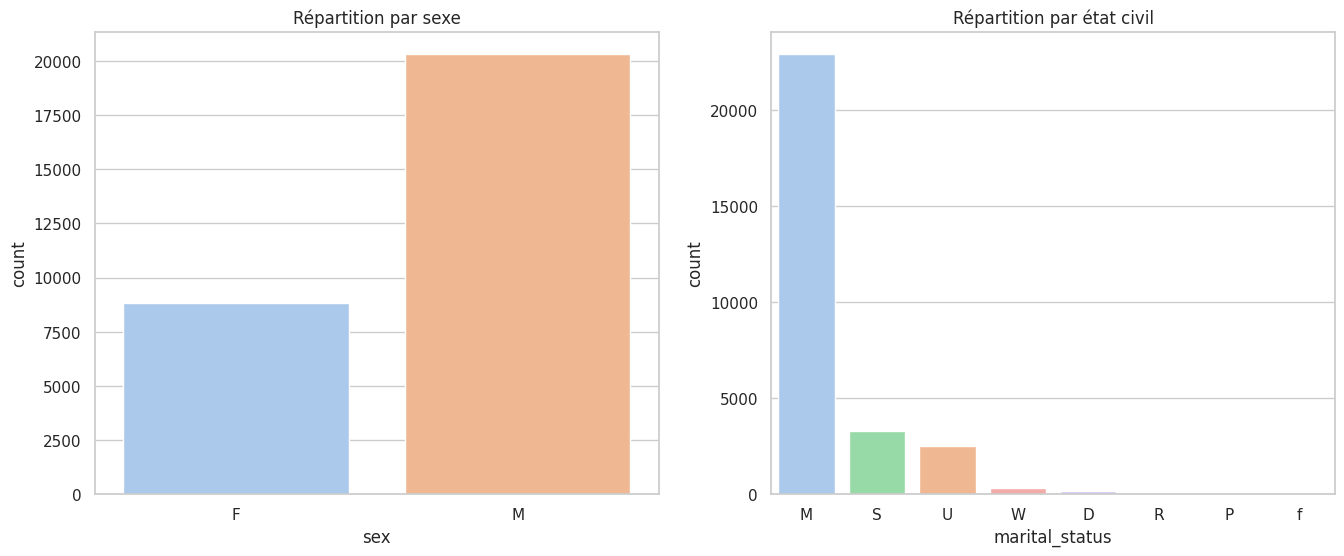

In [17]:
# Variables Démographiques
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sexe
sns.countplot(data=df, x='sex', hue='sex', ax=axes[0], palette='pastel', legend=False)
axes[0].set_title("Répartition par sexe")

# État civil
sns.countplot(data=df, x='marital_status', hue='marital_status', ax=axes[1], palette='pastel', order=df['marital_status'].value_counts().index, legend=False)
axes[1].set_title("Répartition par état civil")
plt.show()

Ces deux graphiques en barres illustrent la distribution des variables catégorielles `sex` (Sexe) et `marital_status` (État civil).

#### 1. Sexe
* **Observation majeure :** Il existe un **déséquilibre significatif** entre les deux catégories.
* **Détails :**
    * **Hommes (M) :** La barre atteint environ **20 000** individus.
    * **Femmes (F) :** La barre se situe autour de **9 000** individus.
* **Interprétation :** La population étudiée est majoritairement masculine (environ 2/3 des données sont des hommes contre 1/3 de femmes).

#### 2. État Civil
* **Observation majeure :** Une catégorie domine écrasante toutes les autres.
* **Détails des catégories (suppositions standards) :**
    * **M (Married/Marié) :** C'est la classe majoritaire avec plus de **22 000** occurrences.
    * **S (Single/Célibataire) :** Deuxième catégorie, mais loin derrière (environ 3 000).
    * **U (Unknown/Unmarried?) :** Environ 2 500.
    * **W (Widowed/Veuf), D (Divorced/Divorcé) :** Très minoritaires.
* **Qualité des données (Data Cleaning) :**
    * On remarque des catégories très faibles ou potentiellement erronées à droite du graphique (**R, P, f**).
    * La catégorie **'f'** (en minuscule) attire particulièrement l'attention car elle semble être une erreur de saisie ou un doublon mal formaté 

### Interprétation
La clientèle est très majoritairement masculine et mariée, cela dessine un profil type « homme marié, chef de famille actif professionnellement ». La faible représentation des femmes et des célibataires montre un positionnement actuel peu attractif pour ces segments.

* Hypothèses :
   1. Les hommes mariés souscriraient davantage aux produits familiaux/protection.
   2. Les femmes et les célibataires pourraient préférer des produits individuels ou santé spécifique.

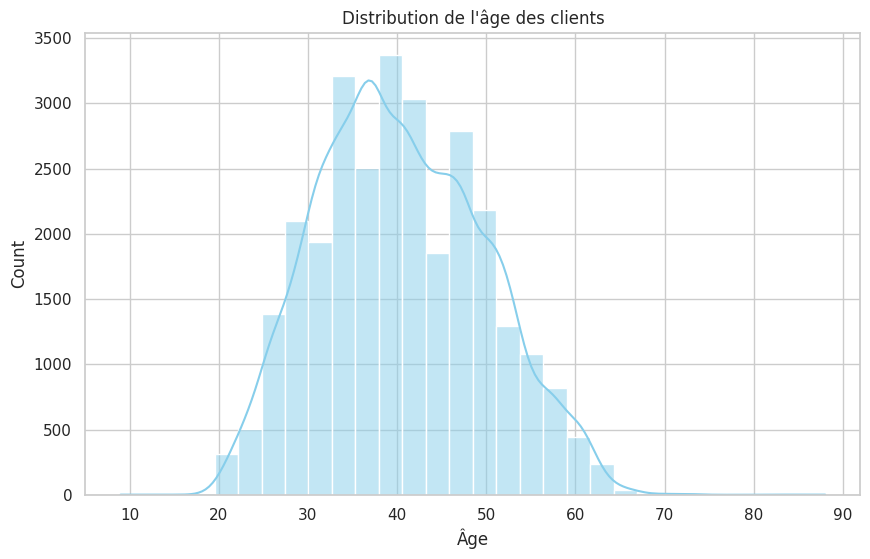

In [18]:
# Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.show()

### Analyse de la Distribution de l'Âge des Clients

Ce graphique présente un histogramme couplé à une courbe de densité (KDE - Kernel Density Estimation) généré avec Seaborn. Il permet de visualiser la fréquence des âges au sein de la base de clients.

#### 1. Observations statistiques
La distribution forme une cloche centrée sur la tranche 30–50 ans (pic autour de 40 ans). La clientèle est essentiellement composée de personnes en pleine activité professionnelle et familiale, avec très peu de jeunes (<25 ans) et de seniors (>60 ans).

#### 2. Interprétation
* **Profil Type :** Le client type est un **adulte actif en milieu de carrière**.
* La tranche 30–50 ans domine les souscriptions aux produits familiaux et protection.
* Les clients plus âgés souscriraient davantage à des produits santé ou de retraite (même s’ils sont rares dans la base).

/usr/local/lib/python3.12/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname I identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/tmp/ipykernel_55/2099658428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_occupations.index, y=top_occupations.values, palette='viridis')
/usr/local/lib/python3.12/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname I identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


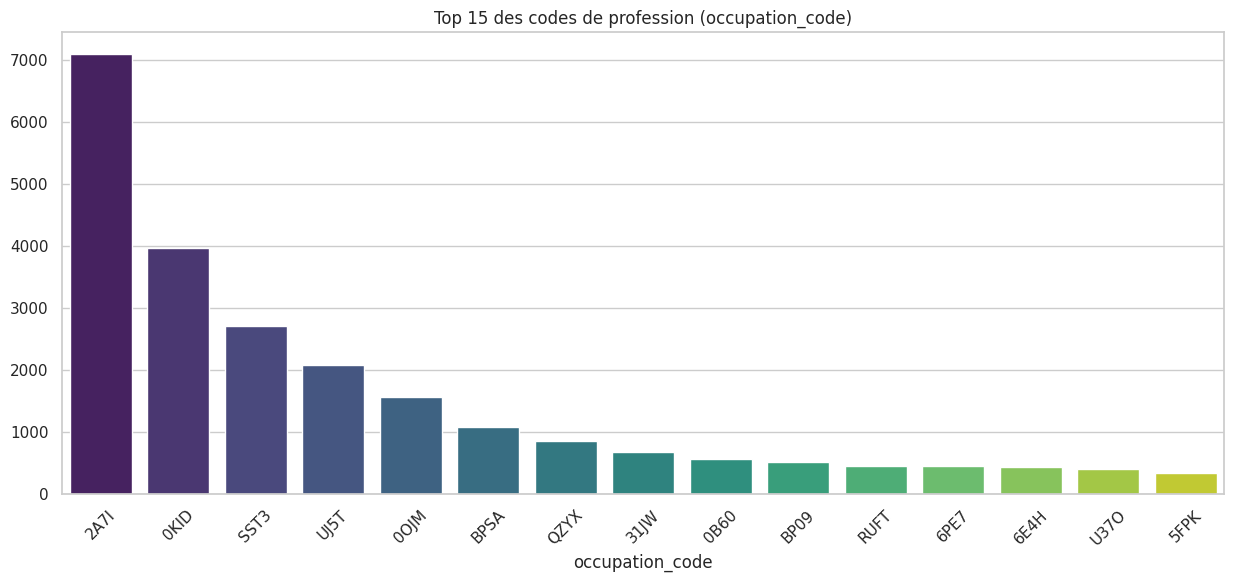

In [19]:
plt.figure(figsize=(15, 6))
top_occupations = df['occupation_code'].value_counts().head(15)
sns.barplot(x=top_occupations.index, y=top_occupations.values, palette='viridis')
plt.title("Top 15 des codes de profession (occupation_code)")
plt.xticks(rotation=45)
plt.show()

### Analyse des Codes de Profession (Top 15)

Ce graphique en barres illustre les 15 codes de profession (`occupation_code`) les plus fréquents dans le jeu de données.

On constate que la clientèle est très fortement concentrée sur un petit nombre de professions : le code 2A7I représente environ 24 % des clients et les 5 premiers codes couvrent plus de 50 % de la base. Cela montre que Zimnat a une pénétration très élevée dans certains secteurs spécifiques, mais une diversité professionnelle limitée.

* Hypothèses :
  
  1. Zimnat a établi des partenariats institutionnels ou des accords de "payroll"     (prélèvement à la source) avec certains employeurs spécifiques ou secteurs publics

  2. Les codes rares pourraient correspondre à des profils à plus haut revenu ou à des besoins spécifiques.


/tmp/ipykernel_55/3176228790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='occupation_category_code', palette='magma',


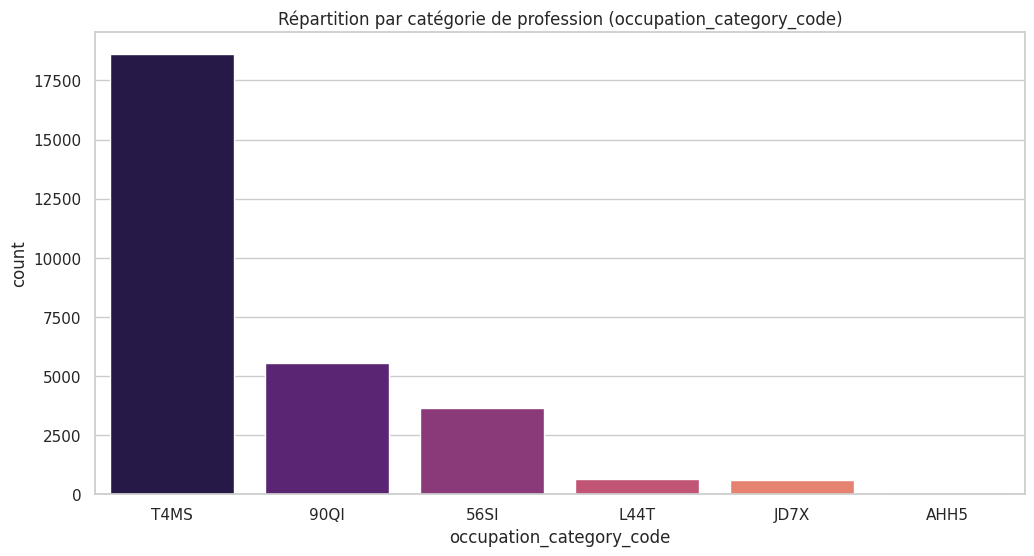

In [20]:
# Analyse des catégories de profession
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='occupation_category_code', palette='magma', 
              order=df['occupation_category_code'].value_counts().index)
plt.title("Répartition par catégorie de profession (occupation_category_code)")
plt.show()

**Catégorie de profession** :
* Interprètation: Une seule catégorie (T4MS) regroupe environ 64 % des clients, rendant cette variable peu discriminante. Les catégories secondaires (90QI, 56SI) représentent ensemble environ 30 %, les autres sont marginales.

* Hypothèses :
  
  1. Zimnat possède un "cœur de cible" très spécifique, probablement des salariés du secteur formel ou des fonctionnaires.
  2. La catégorie dominante T4MS correspond probablement aux clients «standards» qui souscrivent majoritairement aux produits phares.

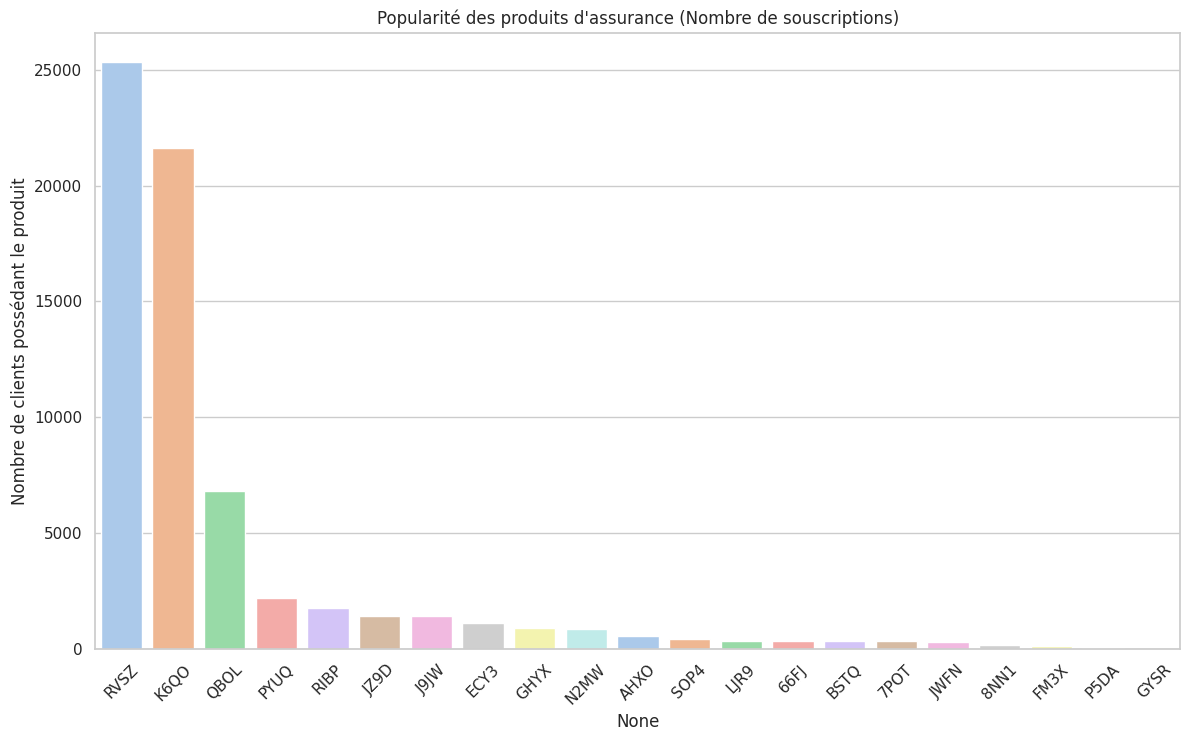

In [21]:
# On somme les colonnes produits pour voir les plus vendus
product_counts = df[product_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x=product_counts.index, y=product_counts.values, palette='pastel', hue=product_counts.index, legend=False)
plt.title("Popularité des produits d'assurance (Nombre de souscriptions)")
plt.xticks(rotation=45)
plt.ylabel("Nombre de clients possédant le produit")
plt.show()

### Popularité des produits d'assurance

Ce graphique en barres classe les différents produits d'assurance (identifiés par des codes comme `RVSZ`, `K6QO`, etc.) en fonction du nombre de clients qui les détiennent.

* Interprètation: Deux produits (RVSZ et K6QO) captent l’immense majorité des souscriptions, tandis que la plupart des autres produits sont très peu souscrits. Cela indique que RVSZ et K6QO sont probablement des produits d’entrée de gamme, obligatoires ou très fortement poussés à la vente.

* Hypothèses :
  1. RVSZ et K6QO sont souvent souscrits ensemble.
  2. Les produits à droite du graphique sont soit des produits très spécialisés, soit des échecs commerciaux, soit des produits nouveaux qui n'ont pas encore pénétré le marché.

## 4. Analyse bivariée

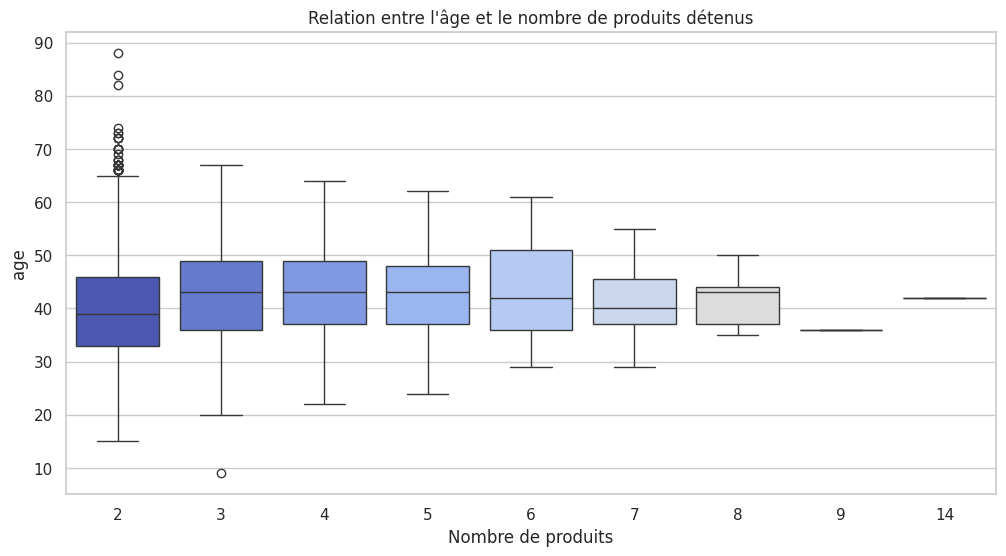

In [22]:
# A. Relation Âge vs Nombre de produits détenus
# Création d'une variable 'total_products'
df['total_products'] = df[product_cols].sum(axis=1)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='total_products', y='age', palette='coolwarm', hue='total_products', legend=False)
plt.title("Relation entre l'âge et le nombre de produits détenus")
plt.xlabel("Nombre de produits")
plt.show()

 **Nombre de produit par âge**
 * Interprètation: La médiane d'âge reste stable autour de 45-50 ans jusqu'à 6-7 produits, puis diminue légèrement pour les multi-souscripteurs extrêmes (8+ produits). Les clients détenant le plus de produits (jusqu'à 14) sont plutôt dans la tranche 40-50 ans, avec moins de variance.

* Hypothèse :
  
  1. Les clients multi-détenteurs sont des profils fidèles et matures , pas forcément plus âgés.

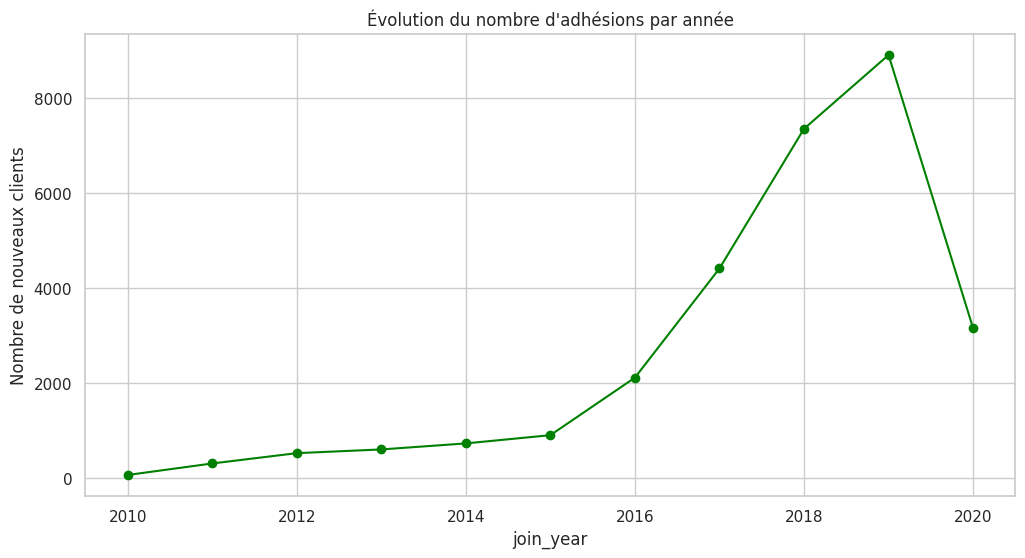

In [23]:
# B. Tendance temporelle (Adhésions par année)
plt.figure(figsize=(12, 6))
df['join_year'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title("Évolution du nombre d'adhésions par année")
plt.ylabel("Nombre de nouveaux clients")
plt.grid(True)
plt.show()

### Analyse de la Tendance Temporelle (Adhésions par Année)

Ce graphique linéaire montre l'évolution du nombre de nouveaux clients (`join_year`) inscrits chaque année entre 2010 et 2020.

#### 1. Phases de Croissance
* **2010 - 2015 : La phase de "Latence" :**
    * La croissance est très lente et linéaire. Le nombre de nouveaux inscrits reste faible (sous la barre des 1 000 par an).
    * C'est une phase de démarrage ou de stagnation.
* **2016 - 2019 : L'Hyper-Croissance :**
    * À partir de 2016, on observe un point d'inflexion majeur. La courbe devient exponentielle.
    * Le nombre d'adhésions double presque chaque année.
    * **Le Pic (Peak) :** L'année 2019 est l'année record, atteignant près de **9 000** nouveaux clients. Cela suggère une campagne marketing réussie ou une expansion massive du marché durant cette période.

#### 2. L'Anomalie de 2020
* **Observation :** On constate une chute brutale et vertigineuse en 2020 (retour au niveau de 2017, environ 3 000 inscrits).
* **Hypothèses explicatives (Data Quality vs Réalité) :**
    * **Hypothèse la plus probable (Données partielles) :** Le jeu de données a probablement été extrait au début ou au milieu de l'année 2020. Si les données s'arrêtent en Mars ou Avril 2020, il est normal que le total soit faible.
    * **Facteur Externe (COVID-19) :** Si les données couvrent toute l'année 2020, la pandémie a pu freiner drastiquement les souscriptions.
    * **Problème Technique :** Un changement de système d'information ou de collecte de données en 2020.

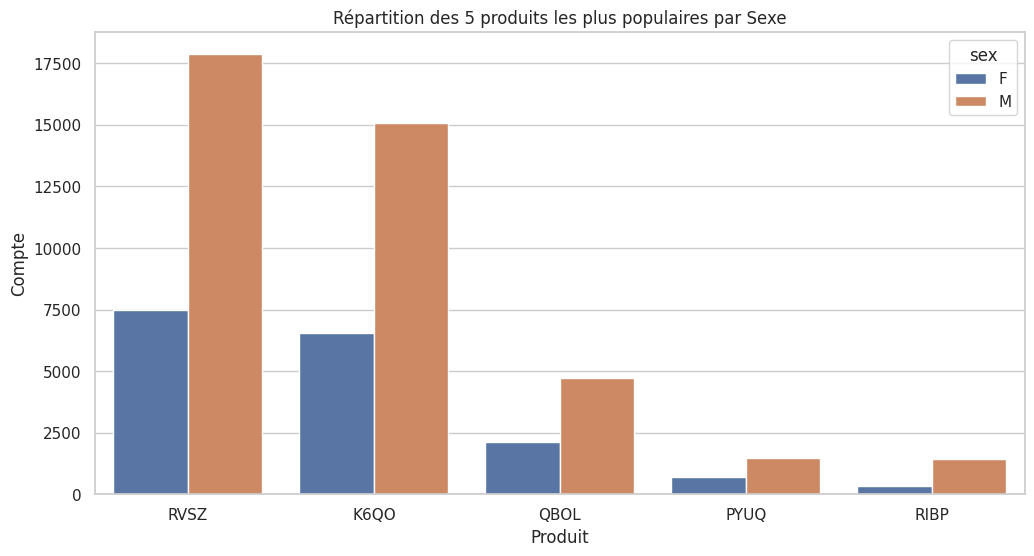

In [24]:
# C. Quels produits pour quel sexe ?
top_5_products = product_counts.head(5).index.tolist()
# Aggrégation pour le graphique
sex_prod = df.groupby('sex')[top_5_products].sum().reset_index()
sex_prod_melted = sex_prod.melt(id_vars='sex', var_name='Produit', value_name='Compte')

plt.figure(figsize=(12, 6))
sns.barplot(data=sex_prod_melted, x='Produit', y='Compte', hue='sex')
plt.title("Répartition des 5 produits les plus populaires par Sexe")
plt.show()

### Analyse Croisée : Préférences Produits selon le Sexe

Ce graphique en barres groupées montre la répartition des souscriptions pour les 5 produits les plus populaires (`RVSZ`, `K6QO`, `QBOL`, `PYUQ`, `RIBP`), en distinguant les hommes (M - Orange) des femmes (F - Bleu).

#### 1. Observations Statistiques
* **Domination Masculine Uniforme :**
    * Sur l'ensemble des 5 produits phares, la barre orange (Hommes) est systématiquement plus haute que la barre bleue (Femmes).
    * Le ratio semble constant : il y a environ **2 à 3 fois plus** de souscriptions masculines que féminines pour chaque produit. Cela reflète parfaitement le déséquilibre global de la population observé au tout début de l'analyse (66% Hommes / 33% Femmes).
* **Même Classement (Ranking) :**
    * L'ordre de préférence est **identique** pour les deux sexes.
    * Le produit `RVSZ` est le n°1 chez les hommes comme chez les femmes.
    * Le produit `K6QO` est le n°2 chez les deux, et ainsi de suite.

#### 2. Interprétation Comportementale
* **Absence de Segmentation Sexuée sur les Top Produits :**
    * Il n'y a pas de "produit pour homme" ou de "produit pour femme" parmi les best-sellers. Les goûts et besoins semblent alignés indépendamment du genre.
    * Le sexe influe sur le **volume** (les hommes achètent plus car ils sont plus nombreux), mais pas visiblement sur la **préférence** (choix du produit A vs B).

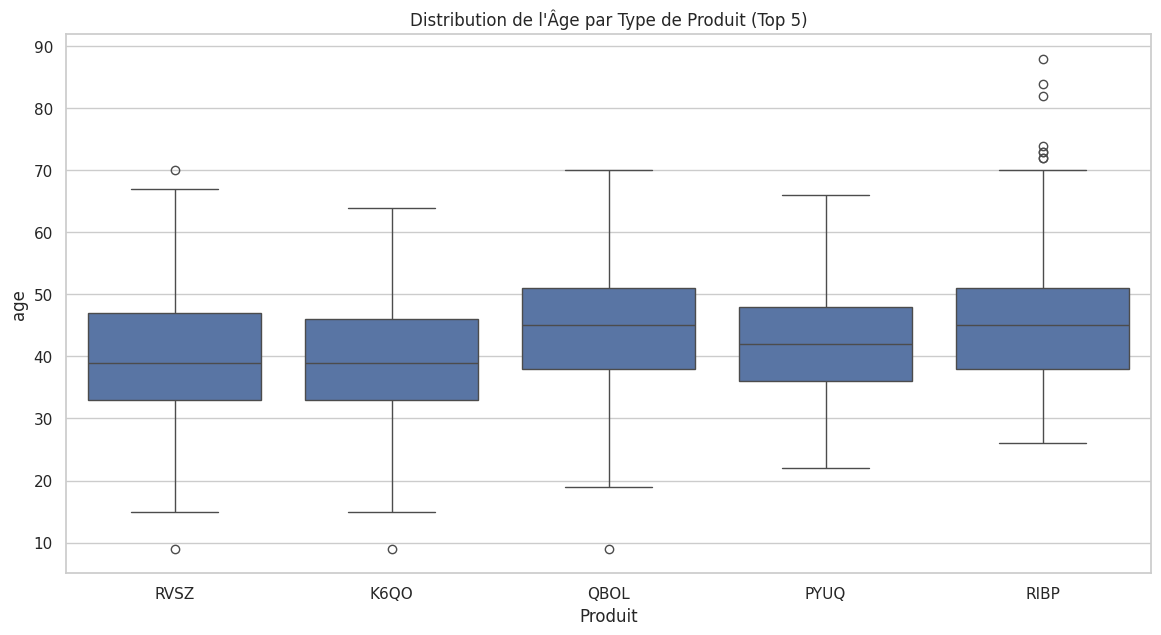

In [25]:
# A. Âge vs Type de Produits (Top 5 produits)
# On regarde la distribution d'âge pour les possesseurs des 5 produits les plus courants
top_5 = df[product_cols].sum().nlargest(5).index
plt.figure(figsize=(14, 7))
melted_age = df.melt(id_vars=['age'], value_vars=top_5, var_name='Produit', value_name='Possede')
sns.boxplot(data=melted_age[melted_age['Possede'] == 1], x='Produit', y='age')
plt.title("Distribution de l'Âge par Type de Produit (Top 5)")
plt.show()

### Analyse de la Distribution de l'Âge par Produit (Top 5)

Ce graphique en boîtes à moustaches compare l'âge des clients possédant les 5 produits les plus populaires (`RVSZ`, `K6QO`, `QBOL`, `PYUQ`, `RIBP`).

#### 1. Observations Statistiques
* **Homogénéité Globale :**
    * La première constatation est la **similitude** des distributions. Pour les 5 produits, le "cœur de cible" (la boîte bleue, représentant 50% des clients) se situe grosso modo entre **33 et 50 ans**.
    * Aucun produit n'est exclusivement réservé aux "très jeunes" ou aux "très vieux".
* **Nuances sur l'Âge Médian (Le trait horizontal) :**
    * **Les produits "Jeunes" (`RVSZ`, `K6QO`) :** Les deux produits les plus populaires ont une médiane légèrement plus basse (autour de **38-40 ans**). Ce sont probablement des produits d'appel ou généralistes.
    * **Les produits "Matures" (`QBOL`, `RIBP`) :** On note un léger décalage vers le haut. La médiane monte vers **45 ans**. Le produit `RIBP` en particulier semble attirer une clientèle un peu plus âgée, avec une boîte qui monte au-dessus de 50 ans.

#### 2. Analyse des Extrêmes (Outliers)
* **Les Seniors et le `RIBP` :**
    * Le produit `RIBP` présente des points aberrants (les cercles) très marqués vers le haut, atteignant 80-90 ans. Cela suggère que ce produit a une utilité spécifique pour les seniors (peut-être une assurance vie ou santé senior), même si le gros des clients reste actif.
* **Les Jeunes Adultes :**
    * Tous les produits ont des moustaches descendant jusqu'à environ 20 ans, confirmant qu'ils sont accessibles dès l'entrée dans la vie active.

#### 3. Conclusion
* **Faible Pouvoir Discriminant :** L'âge seul ne suffit pas à prédire avec certitude quel produit un client va choisir, car les plages d'âge se chevauchent énormément.

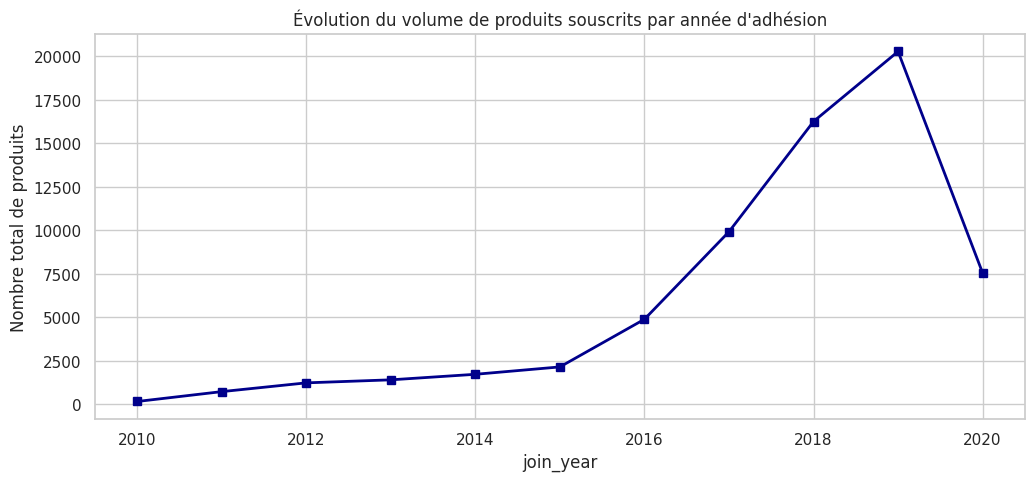

In [26]:
# B. Produits vs join_year (Tendance de souscription)
# Somme des produits par année d'adhésion
prod_per_year = df.groupby('join_year')[product_cols].sum().sum(axis=1)
plt.figure(figsize=(12, 5))
prod_per_year.plot(kind='line', marker='s', color='darkblue', linewidth=2)
plt.title("Évolution du volume de produits souscrits par année d'adhésion")
plt.ylabel("Nombre total de produits")
plt.show()

### Analyse de la Dynamique Commerciale (Volume de Produits vs Ancienneté)

Ce graphique met en relation l'année d'arrivée du client (`join_year`) avec le **volume total de produits** souscrits par cette cohorte de clients.

#### 1. Observations Statistiques
* **Parallélisme parfait :** La courbe suit exactement la même forme que celle du nombre de nouveaux adhérents analysée précédemment.
    * **2010-2015 :** Volume de produits faible et stable.
    * **2016-2019 :** Croissance exponentielle du volume de produits vendus.
    * **2019 :** Année record avec plus de **20 000** produits détenus par les entrants de cette année-là.
    * **2020 :** Chute brutale (probablement due à l'arrêt de la collecte des données en cours d'année).

#### 2. Analyse du Ratio (Insight Clé)
* En comparant ce graphique avec le précédent (Nombre de nouveaux clients), on peut déduire une information cruciale sur la **performance commerciale** :
    * En **2019**, nous avons vu qu'il y avait environ **9 000** nouveaux clients.
    * Sur ce graphique, ces mêmes clients détiennent environ **20 000** produits.
    * **Calcul :** $20 000 / 9 000 \approx 2,2$.
* **Interprétation :** Les clients recrutés lors du pic de croissance (2018-2019) ne sont pas des clients "mono-produit". Ils souscrivent en moyenne à **plus de 2 produits** dès leur arrivée ou très rapidement. La stratégie d'acquisition de l'époque était donc doublement efficace (nombre + équipement).

#### 3. Conclusion
* **Feature "Année" :** La variable `join_year` est définitivement un prédicteur fort. Elle capture à la fois l'ancienneté et le contexte commercial (période de faste vs période calme)

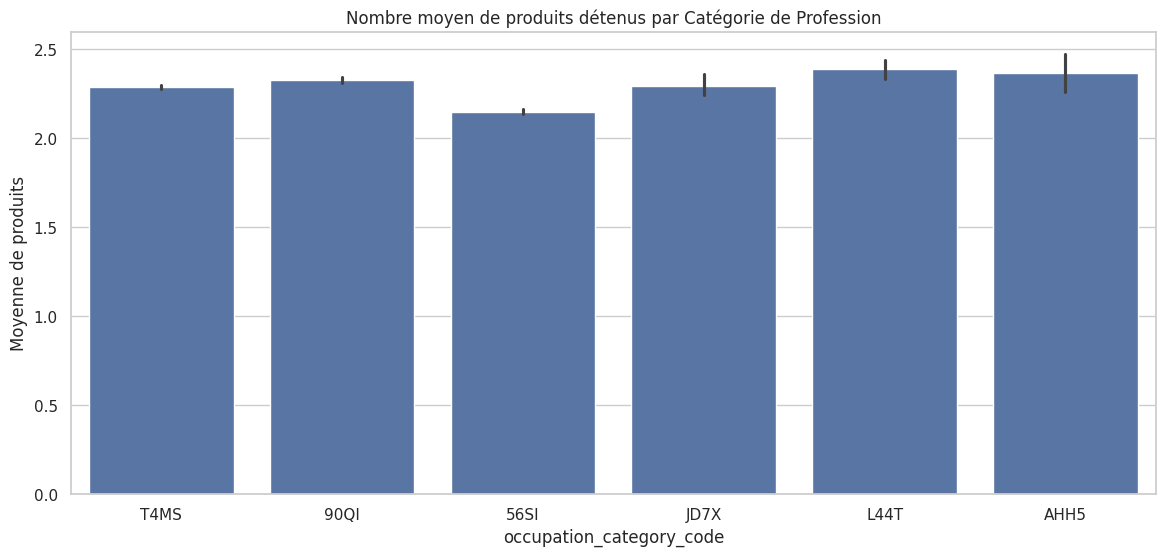

In [27]:
# C & D. Professions (Code et Catégorie) vs Produits
# On analyse le nombre moyen de produits détenus par catégorie socio-professionnelle
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='occupation_category_code', y='total_products', estimator=np.mean)
plt.title("Nombre moyen de produits détenus par Catégorie de Profession")
plt.ylabel("Moyenne de produits")
plt.show()

**Nombre moyens de produits détenus par Catégorie de Profession** :
* Interprètation: Le nombre moyen de produits par client est très proche entre les catégories. Les intervalles de confiance se chevauchent largement, indiquant que les différences ne sont pas statistiquement significatives.
* Hypothèses :
  
  1. La catégorie professionnelle large n'influence pas fortement la multi-détention de produits.
  2. On pourrait trouver des différences plus nettes avec occupation_code.


## 5. Analyse multivariée

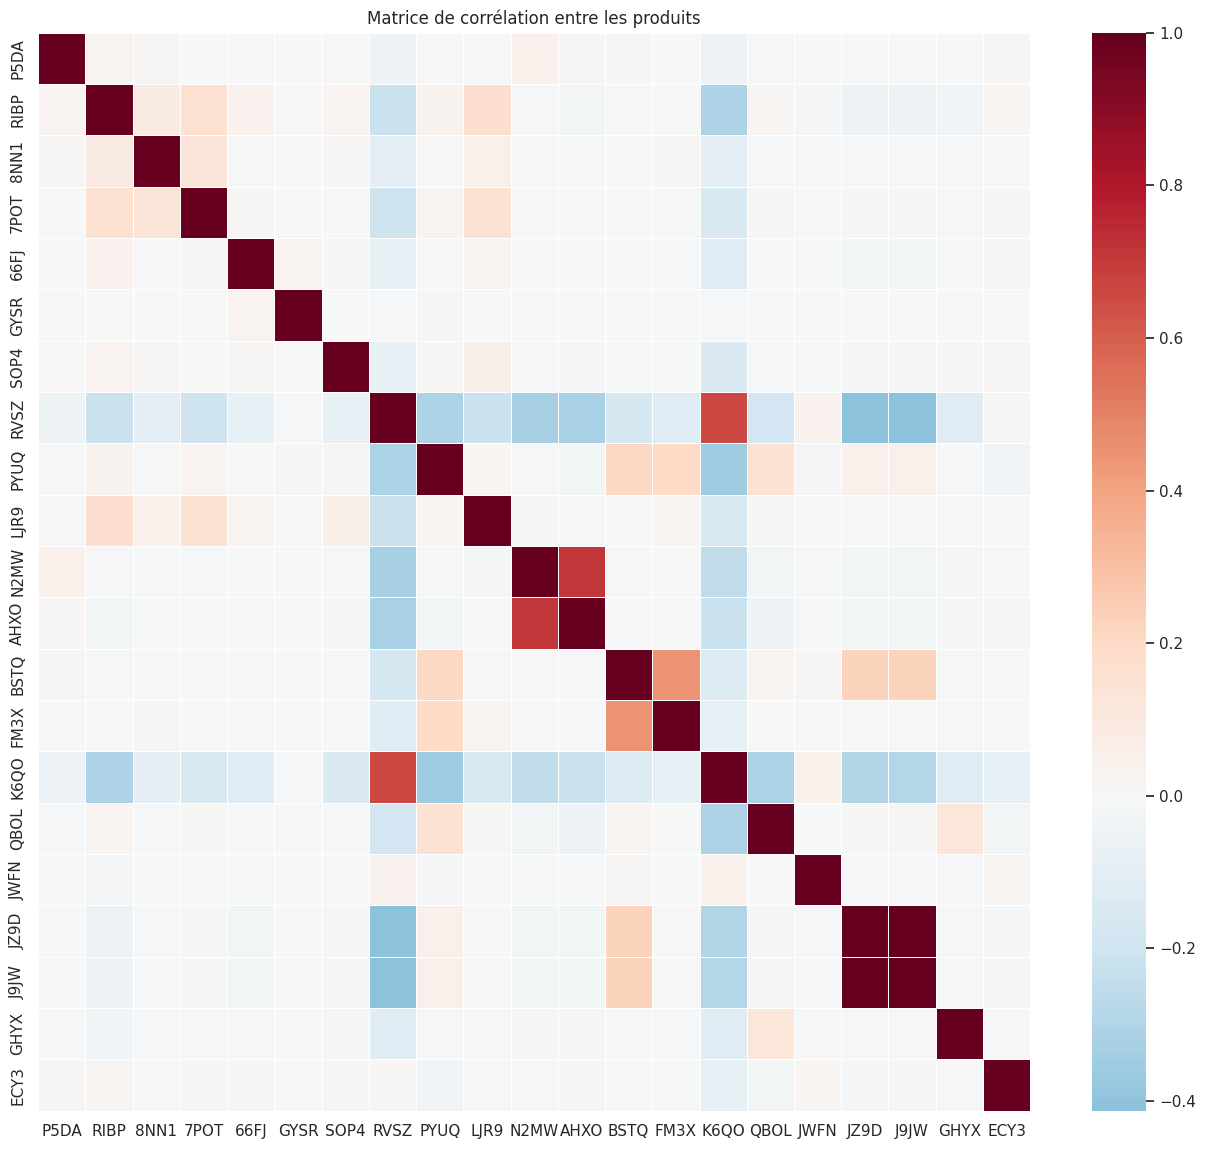

In [28]:
# Matrice de corrélation entre les produits uniquement
# Cela permet de voir quels produits sont souvent achetés ensemble
corr_matrix = df[product_cols].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, cmap='RdBu_r', center=0, linewidths=0.5)
plt.title("Matrice de corrélation entre les produits")
plt.show()

### Analyse des Corrélations entre Produits (Heatmap)

Cette matrice de corrélation (Heatmap) permet d'identifier si certains produits sont souvent achetés ensemble (corrélation positive - Rouge) ou si, au contraire, la possession de l'un exclut la possession de l'autre (corrélation négative - Bleu).

#### 1. Identification des "Bundles" (Corrélations Positives Fortes)
Certains carrés rouge foncé en dehors de la diagonale indiquent des produits très liés :
* **Le Duo `J29D` & `J9JW` :** C'est la corrélation positive la plus forte du graphique (rouge intense en bas à droite).
    * **Interprétation :** Ces deux produits sont presque systématiquement vendus ensemble. Il s'agit probablement d'un "package" ou d'une offre couplée indivisible.
* **Le Duo `N2MW` & `AHXO` :** On observe également un lien fort entre ces deux produits (au centre).
* **Stratégie :** Pour un système de recommandation, si un client achète `J29D`, il faut impérativement lui proposer `J9JW` car la probabilité de succès est proche de 100%.

#### 2. Phénomènes de Substitution ou d'Exclusion (Corrélations Négatives)
Les zones bleues indiquent une relation inverse :
* **Le Cas `RVSZ` vs les autres :**
    * La ligne et la colonne du produit `RVSZ` (le produit le plus populaire) contiennent beaucoup de bleu, notamment au croisement avec `K6QO`.
    * **Interprétation :** Bien que ce soit les deux best-sellers, ils ont une légère tendance à s'exclure mutuellement ou à ne pas être corrélés positivement. Cela peut signifier que ce sont deux produits d'entrée de gamme concurrents (ex: deux types de comptes courants différents).
* **Conflits :** Certaines cases bleu foncé suggèrent que les clients possèdent rarement ces deux produits simultanément (produits incompatibles ou répondant au même besoin).

#### 3. Indépendance Globale
* **Dominante Blanche/Clair :** La grande majorité de la matrice est de couleur pâle (proche de 0).
* **Conclusion :** La plupart des produits sont indépendants les uns des autres. L'achat d'un produit A n'influence pas mathématiquement l'achat d'un produit B pour la majorité du catalogue. Cela valide l'intérêt d'utiliser des algorithmes de Machine Learning non linéaires pour capter des signaux faibles que cette corrélation linéaire ne voit pas.

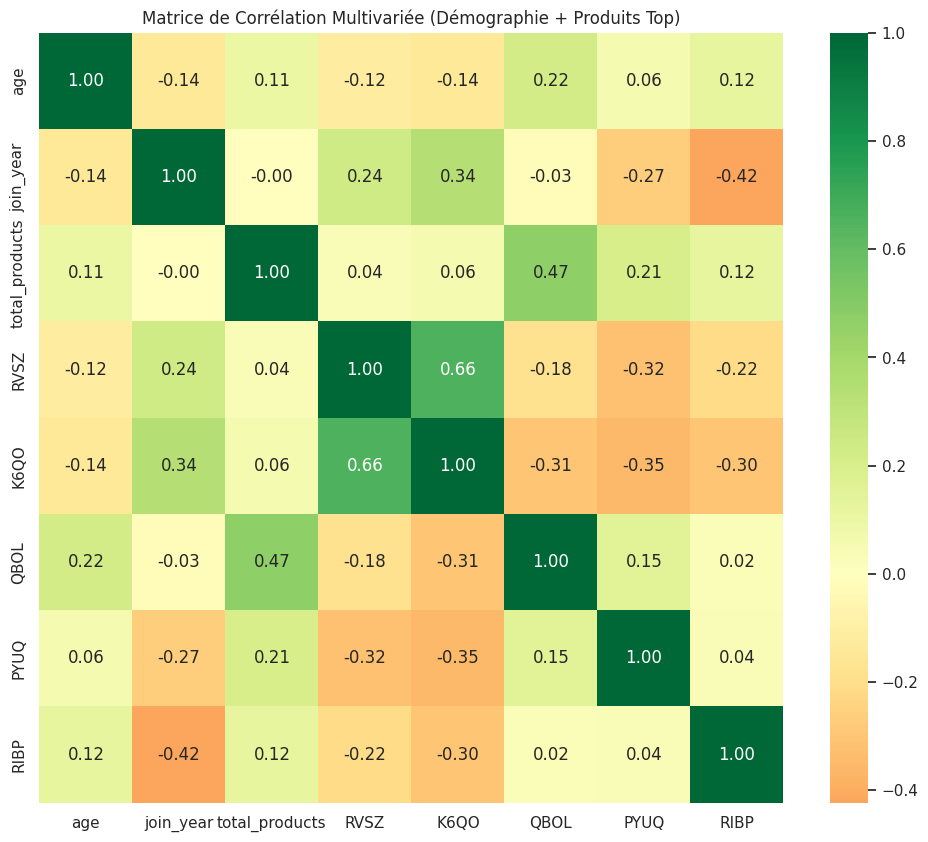

In [29]:
# Sélection des variables clés pour la corrélation multivariée
# On inclut l'âge, l'année d'adhésion et les produits principaux
key_vars = ['age', 'join_year', 'total_products'] + top_5.tolist()
multiv_corr = df[key_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(multiv_corr, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
plt.title("Matrice de Corrélation Multivariée (Démographie + Produits Top)")
plt.show()

### Analyse Multivariée : Corrélations Démographiques et Produits

Cette heatmap présente les coefficients de corrélation de Pearson entre les variables clés : l'âge, l'année d'adhésion (`join_year`), le nombre total de produits, et la possession des 5 produits phares (variables binaires 0/1).

* **Légende :**
    * **Vert (vers +1.0) :** Corrélation positive forte (les variables augmentent ensemble).
    * **Orange (vers -0.4) :** Corrélation négative (quand l'une augmente, l'autre diminue).
    * **Jaune (0.0) :** Aucune corrélation linéaire.

#### 1. Le Facteur Temps (`join_year`) est Déterminant
C'est la colonne la plus intéressante pour comprendre l'évolution du portefeuille :
* **Produits "Modernes" :** On observe une corrélation positive avec **`K6QO` (+0.34)** et **`RVSZ` (+0.24)**.
    * *Interprétation :* Plus l'année d'adhésion est récente (proche de 2020), plus le client a de chances de posséder ces produits. Ce sont les moteurs de la croissance actuelle.
* **Produits "Historiques" :** À l'inverse, il y a une forte corrélation négative avec **`RIBP` (-0.42)** et **`PYUQ` (-0.27)**.
    * *Interprétation :* Ces produits sont détenus par les anciens clients. Les nouveaux entrants ne les souscrivent plus. `RIBP` est un produit en fin de vie ou réservé aux anciens contrats.

#### 2. La Synergie des Best-Sellers
* **Le Duo Gagnant :** Il existe une corrélation très forte (**+0.66**) entre **`RVSZ`** et **`K6QO`**.
    * *Interprétation :* Ces deux produits sont massivement vendus ensemble. Si un client a l'un, il a très probablement l'autre.
* **Oppositions :** Ce duo (`RVSZ`/`K6QO`) est corrélé négativement avec les produits historiques (`PYUQ`, `RIBP`). On a clairement deux époques ou deux gammes de produits distinctes dans l'entreprise.

#### 3. Le Rôle de l'Âge
* **Influence Modérée :** L'âge a des corrélations assez faibles avec la plupart des variables (couleurs jaunâtres).
* **L'Exception `QBOL` (+0.22) :** C'est la corrélation la plus significative pour l'âge. Le produit `QBOL` attire une clientèle plus âgée.
* **`RIBP` (+0.12) :** Confirme légèrement que ce produit historique est détenu par des clients plus âgés (logique, car ils sont là depuis plus longtemps).

#### 4. Le Profil du Client "Multi-équipé" (`total_products`)
* **Le Levier `QBOL` (+0.47) :** C'est la corrélation la plus forte avec le nombre total de produits.
    * *Insight Business :* Un client qui possède `QBOL` est un client très fidèle qui possède beaucoup d'autres produits. C'est un indicateur de haute valeur (High Value Customer).

### Synthèse pour la Modélisation (Feature Engineering)
1.  **Variable `join_year` :** Indispensable. Elle capture la "génération" du client (nouveau vs ancien) qui dicte quel type de produit il possède.
2.  **Interaction Produits :** Le modèle apprendra vite que `RVSZ` implique `K6QO`.
3.  **Segmentation :** Il serait pertinent de créer un flag "Client Historique" vs "Nouveau Client" basé sur l'année d'adhésion, car leurs comportements d'achat sont opposés.

In [30]:
df.columns

Index(['sex', 'marital_status', 'branch_code', 'occupation_code',
       'occupation_category_code', 'P5DA', 'RIBP', '8NN1', '7POT', '66FJ',
       'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X',
       'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3', 'join_year',
       'join_month', 'age', 'total_products'],
      dtype='object')

In [32]:
df_final = df[['sex', 'marital_status', 'branch_code', 'occupation_code',
       'occupation_category_code', 'P5DA', 'RIBP', '8NN1', '7POT', '66FJ',
       'GYSR', 'SOP4', 'RVSZ', 'PYUQ', 'LJR9', 'N2MW', 'AHXO', 'BSTQ', 'FM3X',
       'K6QO', 'QBOL', 'JWFN', 'JZ9D', 'J9JW', 'GHYX', 'ECY3', 'join_year', 'age', 'total_products']].copy()

df_final.head()

,sex,marital_status,branch_code,occupation_code,occupation_category_code,P5DA,RIBP,8NN1,7POT,66FJ,...,K6QO,QBOL,JWFN,JZ9D,J9JW,GHYX,ECY3,join_year,age,total_products
0,F,M,1X1H,2A7I,T4MS,0,0,0,0,0,...,1,0,0,0,0,0,0,2019.0,33,2
1,F,M,UAOD,2A7I,T4MS,0,0,0,0,0,...,1,0,0,0,0,0,0,2019.0,39,2
2,M,U,748L,QZYX,90QI,0,0,0,0,0,...,0,0,0,0,0,0,1,2013.0,29,3
3,M,M,1X1H,BP09,56SI,0,0,0,0,0,...,1,0,0,0,0,0,0,2019.0,30,2
4,M,M,748L,NO3L,T4MS,0,0,0,0,0,...,0,0,0,1,1,0,0,2019.0,30,2


In [33]:
df_final.to_csv('train_.csv')